Text(0, 0.4, 'Perimetro promedio: 197.41')

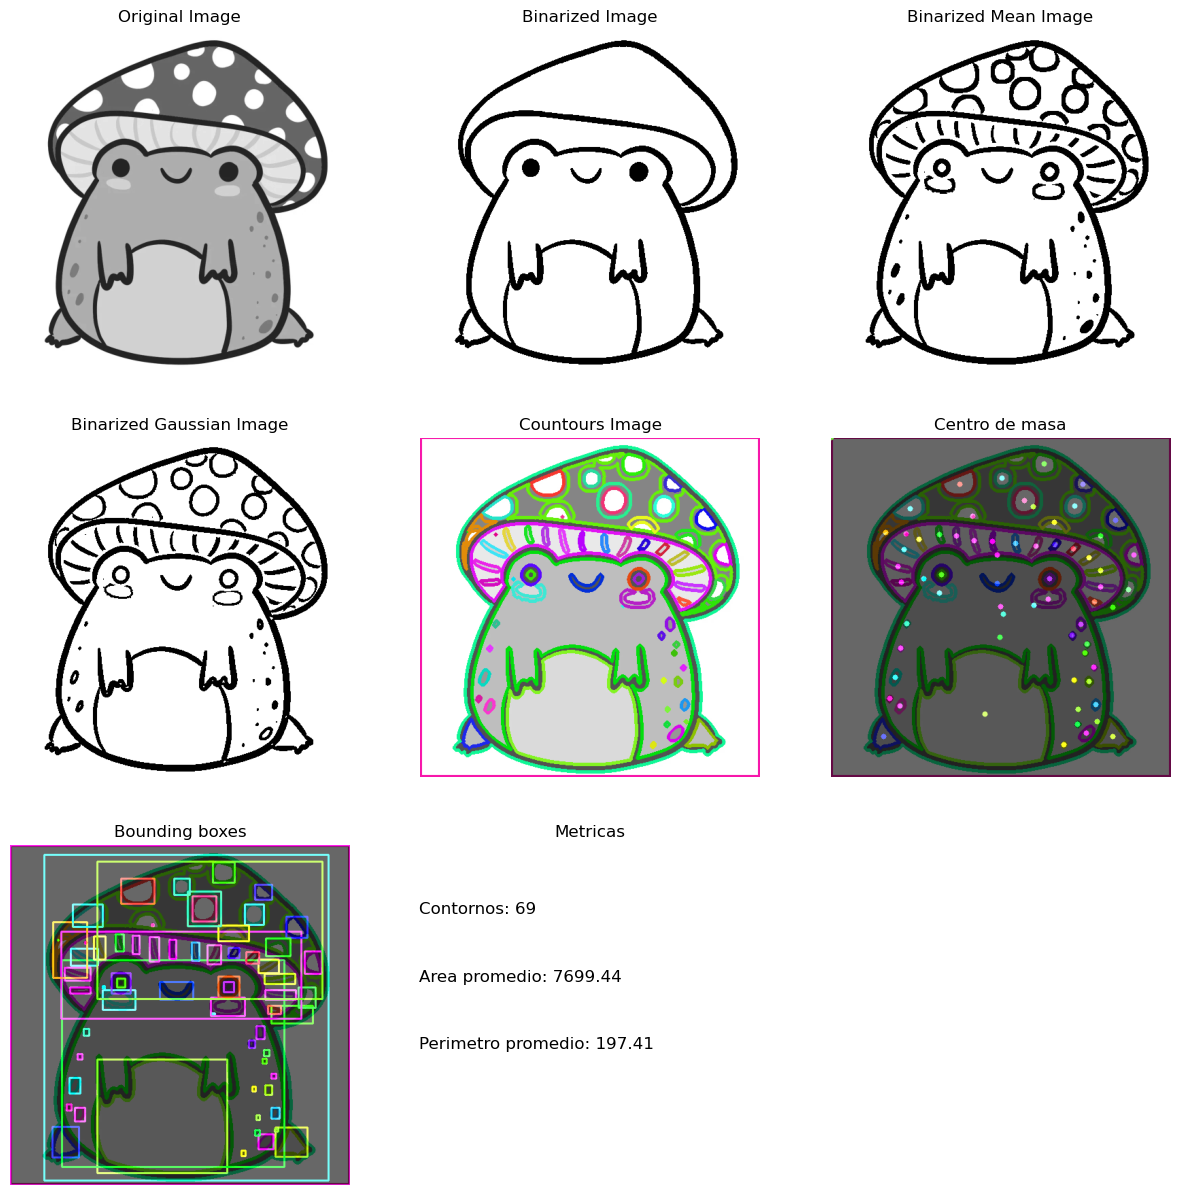

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rng

#image loadiing and resizing
og_image_gray = cv2.imread('../../assets/rana_hongo.png', cv2.IMREAD_GRAYSCALE)
image_gray = cv2.resize(og_image_gray, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

#image binarization
_, binarized = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

#image adaptive binarization
binarized_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13,2)
binarized_gaussian = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13,2)

#set random seed for color reproducibility
rng.seed(45523)

#contour detection
contours, _ = cv2.findContours(binarized_mean, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

#draw contours
colors = [None]*len(contours)
for i in range(len(contours)):

  #colors are randomly generated, with a bias towards saturated colors
  colors[i] = (rng.randint(191,255),rng.randint(0,255),rng.randint(0,63))

  #color channel randomization
  colors[i] = sorted(colors[i], key=lambda x: rng.random())

  contour_img = cv2.drawContours(contour_img, contours, i, colors[i], 3)

#moment and center mass calculation
mc = [None]*len(contours)
for i in range(len(contours)):
  moment = cv2.moments(contours[i])
  mc[i] = (int(moment['m10']/(moment['m00'] + 1e-10)), int(moment['m01']/(moment['m00']+ 1e-10)))

#draw mass centers
center_mass = np.ones(contour_img.shape, dtype=np.uint8)
for i in range(len(contours)):
  center_mass = cv2.circle(center_mass, mc[i], 4, colors[i], -1)
center_mass = cv2.addWeighted(center_mass, 1, contour_img, 0.4, 0)

#calculation and drawing bounding boxes
bound_box = np.ones(contour_img.shape, dtype=np.uint8)
for i in range(len(contours)):
  x, y, w, h = cv2.boundingRect(contours[i])
  bound_box = cv2.rectangle(bound_box, (x,y), (x+w,y+h), colors[i], 2)
bound_box = cv2.addWeighted(bound_box, 1, contour_img, 0.4, 0)

#image file saving (uncomment to save images)
# cv2.imwrite('binarized.png', binarized)
# cv2.imwrite('binarized_mean.png', binarized_mean)
# cv2.imwrite('binarized_gaussian.png', binarized_gaussian)
# cv2.imwrite('contours.png', contour_img)
# cv2.imwrite('center_mass.png', center_mass)
# cv2.imwrite('bound_box.png', bound_box)

#convert images to RGB for matplotlib
contour_img = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
center_mass = cv2.cvtColor(center_mass, cv2.COLOR_BGR2RGB)
bound_box = cv2.cvtColor(bound_box, cv2.COLOR_BGR2RGB)

#figure sizing
imgRatio = image_gray.shape[1] / image_gray.shape[0]
plt.gcf().set_size_inches(5*imgRatio*3, 5*3)

#image plotting
ax = plt.subplot(331)
ax.set_title('Original Image')
ax.axis('off')
ax.imshow(image_gray, cmap='gray')

ax = plt.subplot(332)
ax.set_title('Binarized Image')
ax.axis('off')
ax.imshow(binarized, cmap='gray') 

ax = plt.subplot(333)
ax.set_title('Binarized Mean Image')
ax.axis('off')
ax.imshow(binarized_mean, cmap='gray')

ax = plt.subplot(334)
ax.set_title('Binarized Gaussian Image')
ax.axis('off')
ax.imshow(binarized_gaussian, cmap='gray')

ax = plt.subplot(335)
ax.set_title('Countours Image')
ax.axis('off')
ax.imshow(contour_img)

ax = plt.subplot(336)
ax.set_title('Centro de masa')
ax.axis('off')
ax.imshow(center_mass)

ax = plt.subplot(337)
ax.set_title('Bounding boxes')
ax.axis('off')
ax.imshow(bound_box)

#metrics plotting
ax = plt.subplot(338)
ax.set_title('Metricas')
ax.axis('off')
ax.text(0, 0.8, 'Contornos: {}'.format(len(contours)), fontsize=12)

#mean area calculation and plotting
areas = [cv2.contourArea(c) for c in contours]
ax.text(0, 0.6, 'Area promedio: {:.2f}'.format(np.mean(areas)), fontsize=12)

#mean perimeter and plotting
perimeters = [cv2.arcLength(c, True) for c in contours]
ax.text(0, 0.4, 'Perimetro promedio: {:.2f}'.format(np.mean(perimeters)), fontsize=12)

